In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbs

In [51]:
# Script parameters
input_csv = "results-yasmin/parsec-phoenix.csv"
input_csv = "results-yasmin/parsec-simsmall.csv"
baseline = "x86_64,qemu,risotto"

In [52]:
# Parsing baseline argument
base_arch, base_runtime, base_tag = baseline.split(',')

In [53]:
# Read input file
df = pd.read_csv(input_csv, sep=';')
df

,arch,bench,cmdline,dataset,retval,threads,unit,value,runtime,tag
0,x86_64,parsec.blackscholes,/home/redha/benchmarks/parsec-benchmark-x86_64...,simsmall,0.0,112.0,seconds,0.447747,qemu,qemu
1,x86_64,parsec.blackscholes,/home/redha/benchmarks/parsec-benchmark-x86_64...,simsmall,0.0,112.0,seconds,0.434595,qemu,qemu
2,x86_64,parsec.blackscholes,/home/redha/benchmarks/parsec-benchmark-x86_64...,simsmall,0.0,112.0,seconds,0.439411,qemu,qemu
3,x86_64,parsec.blackscholes,/home/redha/benchmarks/parsec-benchmark-x86_64...,simsmall,0.0,112.0,seconds,0.450076,qemu,qemu
4,x86_64,parsec.blackscholes,/home/redha/benchmarks/parsec-benchmark-x86_64...,simsmall,0.0,112.0,seconds,0.440202,qemu,qemu
...,...,...,...,...,...,...,...,...,...,...
175,x86_64,parsec.vips,/home/redha/benchmarks/parsec-benchmark-x86_64...,simsmall,0.0,112.0,seconds,3.643810,qemu,fence-opt
176,x86_64,parsec.vips,/home/redha/benchmarks/parsec-benchmark-x86_64...,simsmall,0.0,112.0,seconds,3.863666,qemu,fence-opt
177,x86_64,parsec.vips,/home/redha/benchmarks/parsec-benchmark-x86_64...,simsmall,0.0,112.0,seconds,3.653765,qemu,fence-opt
178,x86_64,parsec.vips,/home/redha/benchmarks/parsec-benchmark-x86_64...,simsmall,0.0,112.0,seconds,3.789318,qemu,fence-opt


In [54]:
# Extract baseline from dataframe
base_df = df.loc[(df['arch'] == base_arch) & (df['runtime'] == base_runtime) & (df['tag'] == base_tag)]
base_df

,arch,bench,cmdline,dataset,retval,threads,unit,value,runtime,tag
45,x86_64,parsec.blackscholes,/home/redha/benchmarks/parsec-benchmark-x86_64...,simsmall,0.0,112.0,seconds,0.434095,qemu,risotto
46,x86_64,parsec.blackscholes,/home/redha/benchmarks/parsec-benchmark-x86_64...,simsmall,0.0,112.0,seconds,0.431249,qemu,risotto
47,x86_64,parsec.blackscholes,/home/redha/benchmarks/parsec-benchmark-x86_64...,simsmall,0.0,112.0,seconds,0.430902,qemu,risotto
48,x86_64,parsec.blackscholes,/home/redha/benchmarks/parsec-benchmark-x86_64...,simsmall,0.0,112.0,seconds,0.429884,qemu,risotto
49,x86_64,parsec.blackscholes,/home/redha/benchmarks/parsec-benchmark-x86_64...,simsmall,0.0,112.0,seconds,0.438253,qemu,risotto
50,x86_64,parsec.bodytrack,/home/redha/benchmarks/parsec-benchmark-x86_64...,simsmall,0.0,112.0,seconds,6.580464,qemu,risotto
51,x86_64,parsec.bodytrack,/home/redha/benchmarks/parsec-benchmark-x86_64...,simsmall,0.0,112.0,seconds,6.572814,qemu,risotto
52,x86_64,parsec.bodytrack,/home/redha/benchmarks/parsec-benchmark-x86_64...,simsmall,0.0,112.0,seconds,6.629369,qemu,risotto
53,x86_64,parsec.bodytrack,/home/redha/benchmarks/parsec-benchmark-x86_64...,simsmall,0.0,112.0,seconds,6.572133,qemu,risotto
54,x86_64,parsec.bodytrack,/home/redha/benchmarks/parsec-benchmark-x86_64...,simsmall,0.0,112.0,seconds,6.582814,qemu,risotto


In [55]:
# Get the mean for each baseline benchmark
base_means = {}
for b in set(base_df['bench']):
    base_means[b] = np.array(base_df.loc[base_df['bench'] == b]['value'].values, dtype=np.float32).mean()

In [56]:
# Print the mean of every benchmark for each runtime
mean_df = pd.DataFrame()
for b in sorted(set(df['bench'])):
    df_b = df.loc[df['bench'] == b]
    tmp_dict = { 'bench': b }
    for t in set(df_b['tag']):
        df_b_t = df_b.loc[df_b['tag'] == t]
        tmp_dict[t] = np.mean(df_b_t['value'])
    mean_df = mean_df.append(tmp_dict, ignore_index=True)
mean_df

,bench,no-fences,risotto,qemu,fence-opt
0,parsec.blackscholes,0.315098,0.432877,0.442406,0.418737
1,parsec.bodytrack,2.360273,6.587519,7.803257,6.425363
2,parsec.canneal,15.267585,17.644450,17.762744,17.304921
3,parsec.facesim,106.705269,520.554029,585.541250,516.844695
4,parsec.fluidanimate,2.809571,5.340541,5.791260,5.368046
5,parsec.freqmine,2.153403,3.423083,3.765122,3.543815
6,parsec.streamcluster,7.118677,16.966433,18.781953,15.849354
7,parsec.swaptions,0.725283,2.745984,2.805127,2.631960
8,parsec.vips,2.251730,3.711964,4.172037,3.740599


In [57]:
# Normalize all results from original df to these means
df_norm = pd.DataFrame(columns=['arch', 'bench', 'dataset', 'threads', 'unit', 'value', 'runtime',
                                'tag', 'norm', 'label'])
norm_vals = []
for row in df.itertuples():
    try:
        if row.arch == base_arch and row.runtime == base_runtime and row.tag == base_tag:
            continue
        # norm = base_means[row.bench] / float(row.value)      # speedup
        norm = float(row.value) / base_means[row.bench]    # relative perf
        
        # norm = 100 * (base_means[row.bench] - float(row.value)) / base_means[row.bench]
        dct = row._asdict()
        dct['norm'] = norm
        dct['label'] = f"{dct['tag']}"
        # dct['label'] = f"{dct['runtime']}-{dct['tag']}"
        del dct['Index']
        del dct['cmdline']
        norm_vals.append(dct)
    except KeyError:
        pass
df_norm = df_norm.append(norm_vals, ignore_index=True)
df_norm

,arch,bench,dataset,threads,unit,value,runtime,tag,norm,label,retval
0,x86_64,parsec.blackscholes,simsmall,112.0,seconds,0.447747,qemu,qemu,1.034353,qemu,0.0
1,x86_64,parsec.blackscholes,simsmall,112.0,seconds,0.434595,qemu,qemu,1.003969,qemu,0.0
2,x86_64,parsec.blackscholes,simsmall,112.0,seconds,0.439411,qemu,qemu,1.015094,qemu,0.0
3,x86_64,parsec.blackscholes,simsmall,112.0,seconds,0.450076,qemu,qemu,1.039733,qemu,0.0
4,x86_64,parsec.blackscholes,simsmall,112.0,seconds,0.440202,qemu,qemu,1.016921,qemu,0.0
...,...,...,...,...,...,...,...,...,...,...,...
130,x86_64,parsec.vips,simsmall,112.0,seconds,3.643810,qemu,fence-opt,0.981639,fence-opt,0.0
131,x86_64,parsec.vips,simsmall,112.0,seconds,3.863666,qemu,fence-opt,1.040868,fence-opt,0.0
132,x86_64,parsec.vips,simsmall,112.0,seconds,3.653765,qemu,fence-opt,0.984321,fence-opt,0.0
133,x86_64,parsec.vips,simsmall,112.0,seconds,3.789318,qemu,fence-opt,1.020839,fence-opt,0.0


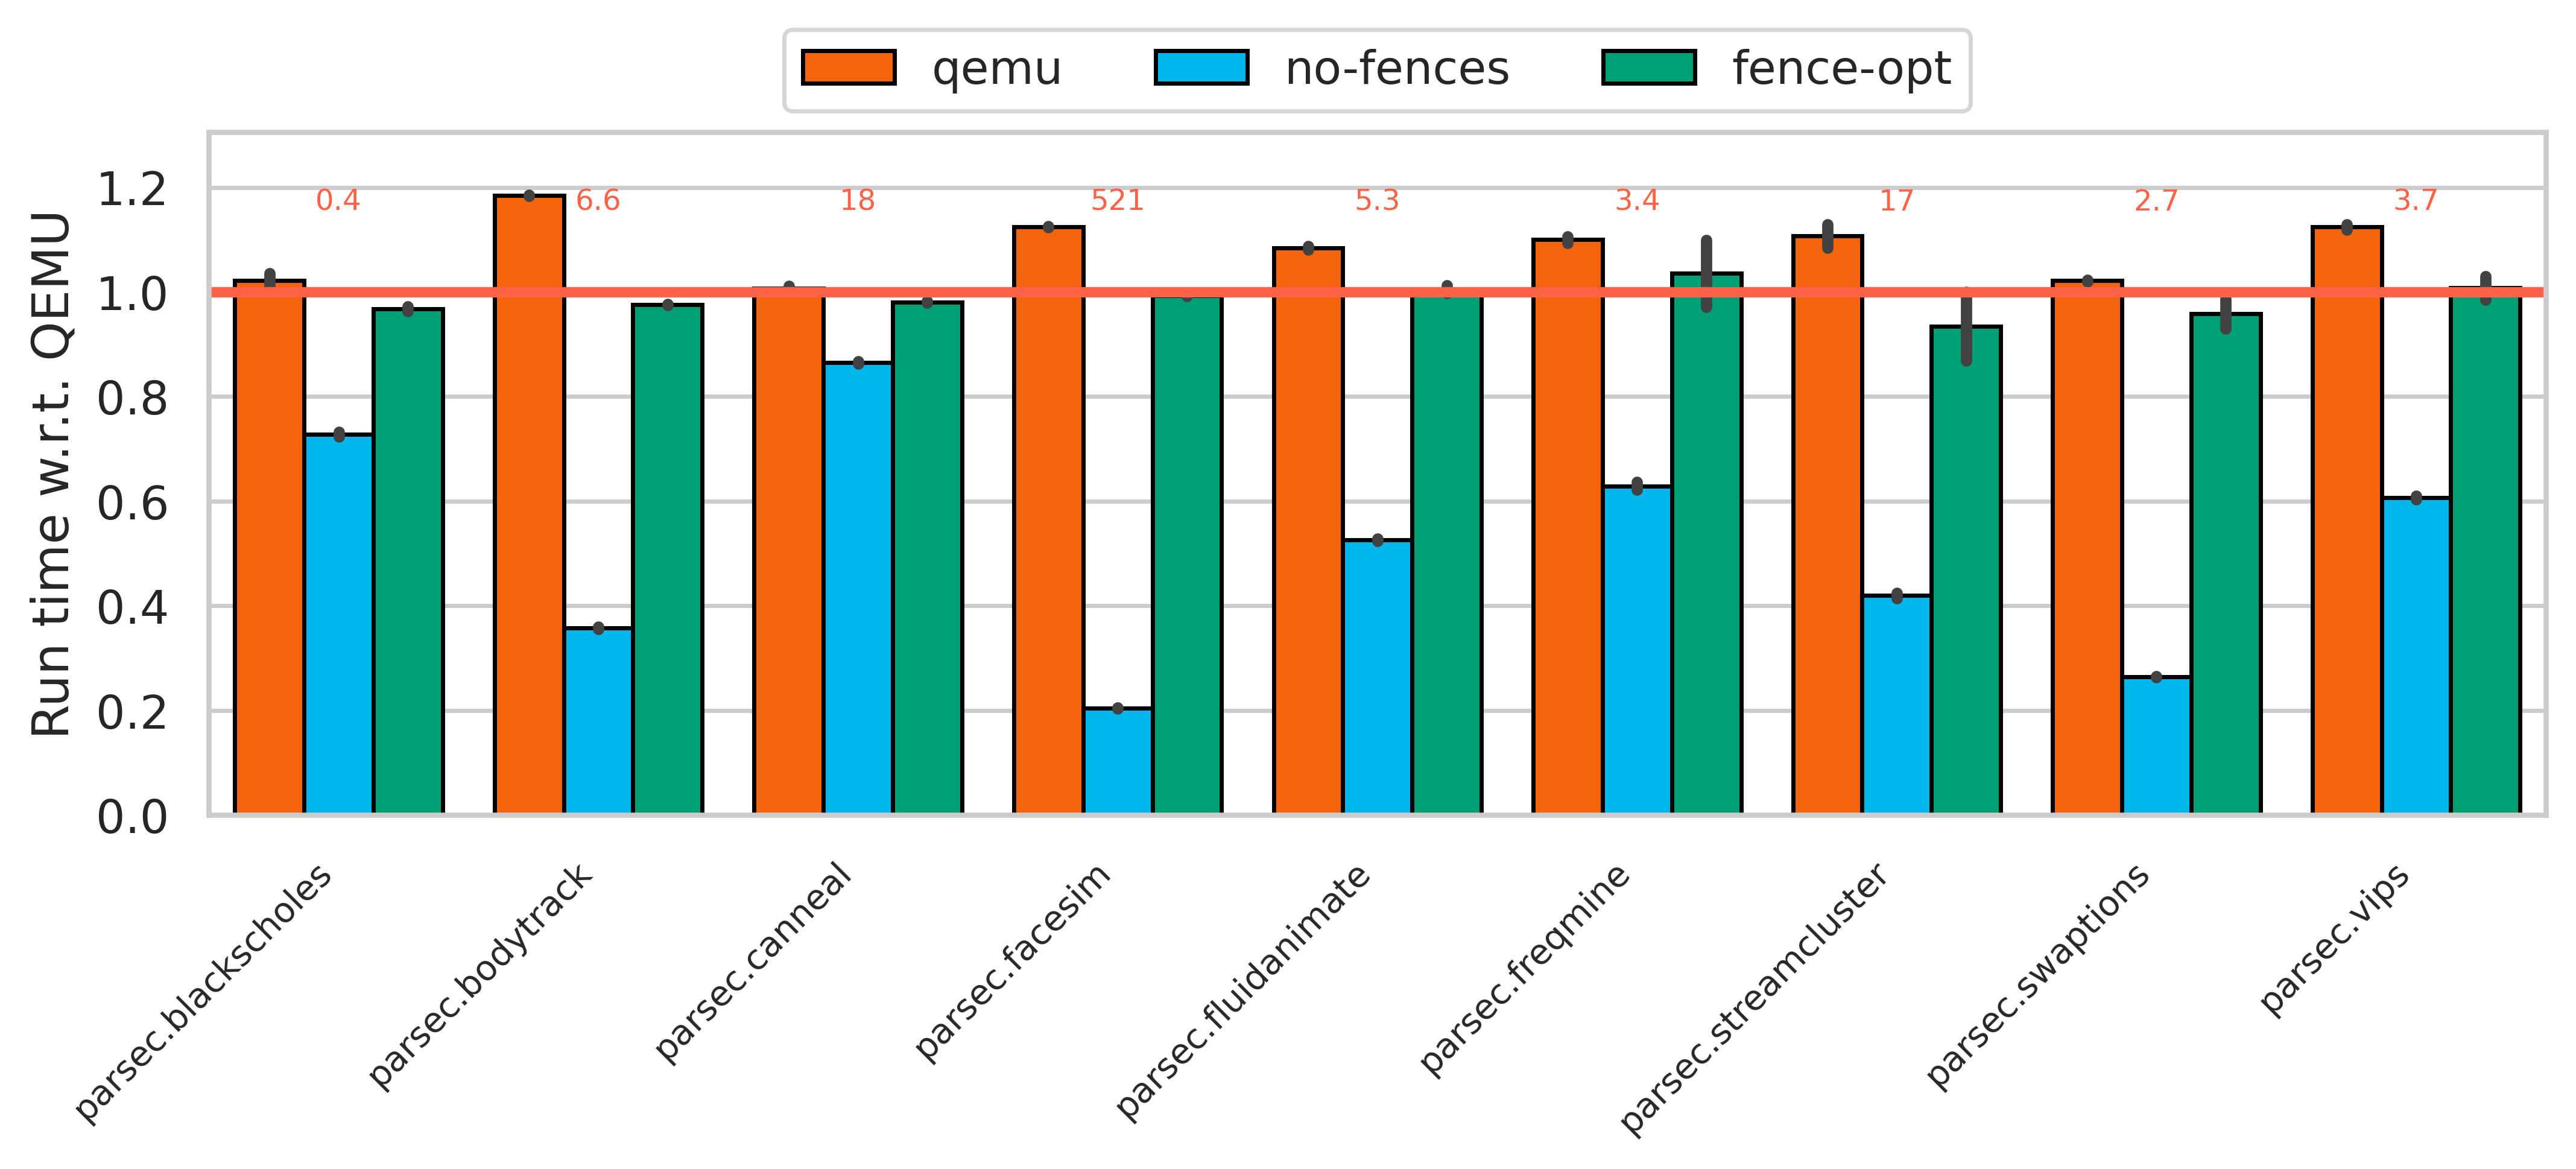

In [58]:
# Plot
fig = plt.figure(figsize=(10, 3), dpi=500)
sbs.set(style="whitegrid")
palette = {
    'orange': '#faa200',
    'sky blue': '#00b7ec',
    'bluish green': '#00a077',
    'yellow': '#f5e636',
    'blue': '#0077b8',
    'vermillion': '#f3640d',
    'reddish purple': '#e47ead'
}
ax = sbs.barplot(data=df_norm, ci='sd',
                 x='bench', y='norm',
                 hue='label',# palette=palette,
                 order=sorted(set(df_norm['bench'])))
plt.grid(visible=True, axis='y')
plt.xticks(rotation=45, ha="right", fontsize='x-small')
ax.set_axisbelow(True)
plt.xlabel("")
max_val = max(df_norm['norm'].values)
plt.ylim(0, max_val*1.1)
plt.ylabel("Run time w.r.t. QEMU")
plt.axhline(y=1, xmin=0, xmax=1, color='tomato', linewidth=2.5)
# Annotate the raw value of the baseline
for idx, value in enumerate(sorted(set(base_means))):
    tmp = df_norm.loc[df_norm['bench'] == value]['norm'].values.mean()
    v = base_means[value]
    if v < 10:
        v_str = f"{v:.1f}"
    else:
        v_str = f"{v:.0f}"
    plt.text(idx, max(tmp, max_val - .03), v_str, fontsize='xx-small', color='tomato', ha='center')
    
# Set color + hatch
style = {
    'fill': [ True, True, True ],
    'color': [ palette['vermillion'], palette['sky blue'], palette['bluish green'] ],
    'hatch': [ '', '', ''],
    'edgecolor': [ 'black', 'black', 'black' ]
}
for idx, bar in enumerate(ax.patches):
    bar_nr = int(idx / len(base_means))
    bar.set(color=style['color'][bar_nr], fill=style['fill'][bar_nr],
            hatch=style['hatch'][bar_nr], edgecolor=style['edgecolor'][bar_nr])

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),borderaxespad=0, ncol=4)

In [59]:
fig.savefig(f"{input_csv[:-3]}pdf", dpi=500, bbox_inches='tight')

In [60]:
# Compute fence cost
fence_cost = 100 * (1 - mean_df['no-fences'] / mean_df['qemu'])
print(f"Average time spent on fences: {fence_cost.mean():.2f}%")

Average time spent on fences: 52.32%


In [61]:
# tcg-tso gain
for b in sorted(set(df_norm['bench'])):
    d = df_norm.loc[df_norm['bench'] == b]
    d = d.loc[d['tag'] == 'tcg-tso']
    print(f"{b}: {d['value'].values.mean():.2f}")

parsec.blackscholes: nan
parsec.bodytrack: nan
parsec.canneal: nan
parsec.facesim: nan
parsec.fluidanimate: nan
parsec.freqmine: nan
parsec.streamcluster: nan
parsec.swaptions: nan
parsec.vips: nan


/tmp/ipykernel_172337/344366082.py:5: RuntimeWarning: Mean of empty slice.
  print(f"{b}: {d['value'].values.mean():.2f}")
/usr/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [62]:
mean_df['tcg-tso-pct'] = 100 * (1 - mean_df['tcg-tso'] / mean_df['qemu'])
mean_df

KeyError: 'tcg-tso'

In [ ]:
mean_df['tcg-tso-pct'].values.mean()

In [75]:
mean_df['fence-opt-improv'] = 100 * (1 - mean_df['fence-opt'] / mean_df['risotto'])
mean_df[['bench','fence-opt-improv']]

,bench,fence-opt-improv
0,parsec.blackscholes,3.266362
1,parsec.bodytrack,2.461558
2,parsec.canneal,1.924284
3,parsec.facesim,0.712574
4,parsec.fluidanimate,-0.515021
5,parsec.freqmine,-3.526988
6,parsec.streamcluster,6.584051
7,parsec.swaptions,4.152410
8,parsec.vips,-0.771425
